In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('voice.csv')


In [3]:
data.shape


(3168, 21)

In [4]:
data.isnull().sum()


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
import numpy as np
from matplotlib import pyplot as py

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
my_labels = ('male', 'female')

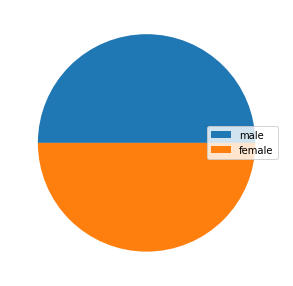

In [7]:
ax = data['label'].value_counts().plot(kind='pie', figsize=(5,5), labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

In [8]:
y=[]
for i in range(len(data.label)):
    if data.label[i] =='male':
        y.append(1)
    else:
        y.append(0)
x = data.drop(["label"], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()

In [11]:
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.fit_transform(X_test)

In [12]:
#a. Desicion Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy')
classifierDT.fit(X_train, y_train)
y_pred = classifierDT.predict(X_test)
y_pred.shape
#y_test= y_test.T.reshape(792,1)
print('Using Decision tree classifier:')
print('Accuracy of training set: {:.2f}'.format(classifierDT.score(X_train,y_train)))
print('Accuracy of test set: {:.2f}'.format(classifierDT.score(X_test,y_test)))

Using Decision tree classifier:
Accuracy of training set: 1.00
Accuracy of test set: 0.96


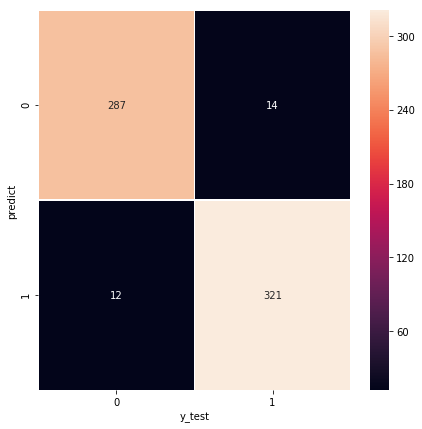

In [13]:
import seaborn as sns
conf_matrix =sklearn.metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

In [14]:
print('     Classifiction report of Decision Tree model')
print('------------------------------------------------------')
print(sklearn.metrics.classification_report(y_test,y_pred))

     Classifiction report of Decision Tree model
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       301
           1       0.96      0.96      0.96       333

   micro avg       0.96      0.96      0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [15]:
#b. Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifierDT = RandomForestClassifier(n_estimators = 100)
classifierDT.fit(X_train, y_train)
y_pred = classifierDT.predict(X_test)
print("ACCURACY OF THE Random Forest MODEL: ", accuracy_score(y_test, y_pred))


ACCURACY OF THE Random Forest MODEL:  0.9842271293375394


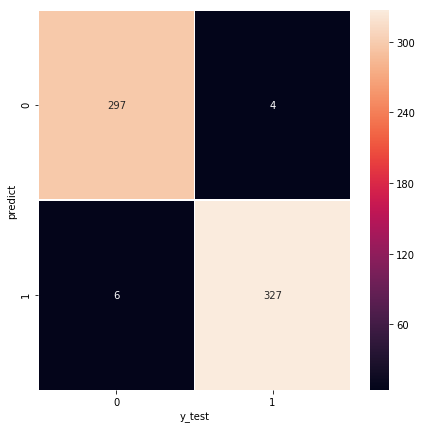

In [16]:
conf_matrix =sklearn.metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

In [17]:
print('     Classifiction report of Random Forest model')
print('------------------------------------------------------')
print(sklearn.metrics.classification_report(y_test,y_pred))

     Classifiction report of Random Forest model
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [18]:
#c. knn algorithm
from sklearn.metrics import accuracy_score
for i in range(1,10,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    print("KNN accuracy (k={}): {}".format(i, accuracy_score(knn.predict(X_test),y_test)))

KNN accuracy (k=1): 0.9684542586750788
KNN accuracy (k=3): 0.9716088328075709
KNN accuracy (k=5): 0.9747634069400631
KNN accuracy (k=7): 0.973186119873817
KNN accuracy (k=9): 0.973186119873817


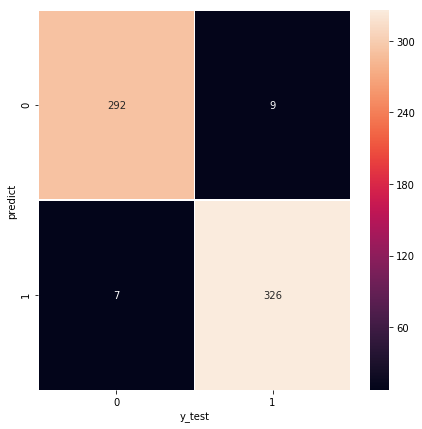

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5) # found that at k = 5, it got better accuracy
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
conf_matrix =sklearn.metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

In [20]:
print('      Classifiction report of KNN algorithm model')
print('------------------------------------------------------')
print(sklearn.metrics.classification_report(y_test,y_pred))

      Classifiction report of KNN algorithm model
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       301
           1       0.97      0.98      0.98       333

   micro avg       0.97      0.97      0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [21]:
#d. Logistic Regression 
import warnings

warnings.filterwarnings("ignore")
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy of Logistic Regression model {}".format(lr.score(X_test,y_test)))

Accuracy of Logistic Regression model 0.9794952681388013


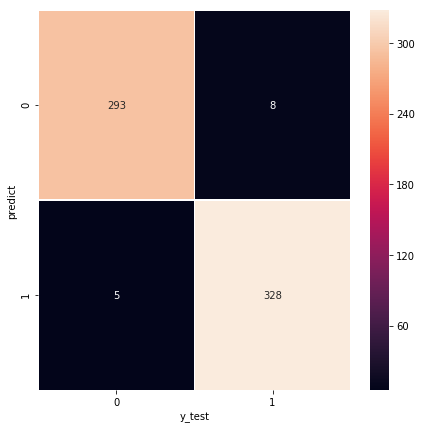

In [22]:
conf_matrix =sklearn.metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

In [23]:
print('    Classifiction report of Logistic regression')
print('------------------------------------------------------')
print(sklearn.metrics.classification_report(y_test,y_pred))

    Classifiction report of Logistic regression
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       301
           1       0.98      0.98      0.98       333

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [24]:
#e. SVM classifier model
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Using SVM classifier:')
print('Accuracy of training set: {:.3f}'.format(classifier.score(X_train,y_train)))
print('Accuracy of test set: {:.3f}'.format(classifier.score(X_test,y_test)))

Using SVM classifier:
Accuracy of training set: 0.985
Accuracy of test set: 0.984


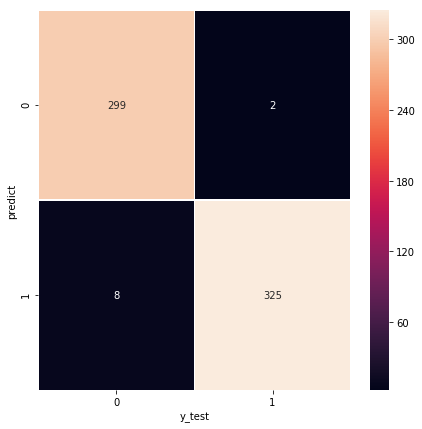

In [25]:
conf_matrix =sklearn.metrics.confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

In [26]:
print('     Classifiction report of SVM Classifier model')
print('------------------------------------------------------')
print(sklearn.metrics.classification_report(y_test,y_pred))

     Classifiction report of SVM Classifier model
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       301
           1       0.99      0.98      0.98       333

   micro avg       0.98      0.98      0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

